In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, Dropout, Input, BatchNormalization, Rescaling
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report


In [2]:
img = np.load('./data/images.npy')
lbl = np.load('./data/labels.npy')
print(f"{img.shape=}  {lbl.shape=}")

img.shape=(18000, 150, 150)  lbl.shape=(18000, 2)


In [3]:
img = img.astype(float) 
# img = np.expand_dims(img, -1)
print(f"{img.shape=}  {lbl.shape=}")

img.shape=(18000, 150, 150)  lbl.shape=(18000, 2)


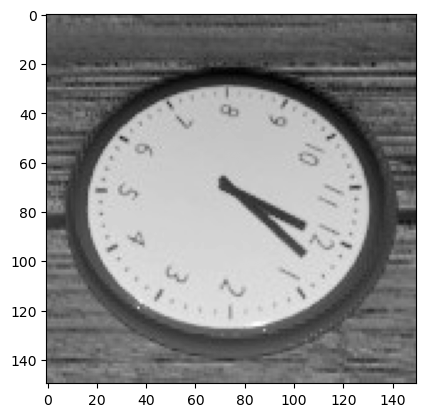

In [4]:
plt.figure()
plt.imshow(img[89])
plt.gray()
plt.show()

In [5]:
def convert_for_reg(y):
    return y[:,0] + y[:,1]/60

In [6]:
X_train, X_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=42)
img_rows, img_cols = X_train[0].shape

In [7]:
# reshape data
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(f'{input_shape=}')

input_shape=(150, 150, 1)


In [8]:
def CSE(y_true, y_pred): # common sense error
   cse = tf.reduce_mean(tf.math.minimum(
          tf.math.abs(y_true - y_pred),
          tf.math.abs(tf.math.minimum(y_true, y_pred) + 12 - tf.math.maximum(y_true, y_pred))))
   return cse

def Mean_loss(y_true, y_pred): # common sense error
   cse = tf.reduce_mean(tf.math.minimum(
          tf.math.abs(y_true - y_pred),
          tf.math.abs(tf.math.minimum(y_true, y_pred) + 12 - tf.math.maximum(y_true, y_pred))))*60
   return cse

In [9]:
y_train_reg = convert_for_reg(y_train)
y_test_reg = convert_for_reg(y_test)

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
reg_model_1 = tf.keras.models.Sequential([
      Rescaling(1./255, input_shape=input_shape),
      Conv2D(16, kernel_size=5, kernel_initializer='he_normal', activation='leaky_relu'),
      MaxPooling2D(pool_size=(2, 2)), 
      
      Conv2D(32, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      Conv2D(32, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      MaxPooling2D(pool_size=(2, 2)), 
      
      Conv2D(64, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      Conv2D(64, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      MaxPooling2D(pool_size=(2, 2)), 
      Dropout(.5),
      Flatten(),
      
      Dense(512, activation='relu', kernel_initializer='he_normal'),
      Dense(256, activation='relu', kernel_initializer='he_normal'),
      Dense(128, activation='relu', kernel_initializer='he_normal'),
      Dense(1, activation='linear'),      
])

In [4]:
reg_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 146, 146, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                    

In [ ]:
reg_model_1.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.001), 
    loss=['mae'], 
    metrics=[Mean_loss]
)

history_1 = reg_model_1.fit(X_train, y_train_reg, epochs=20, batch_size=128, validation_split=0.2)


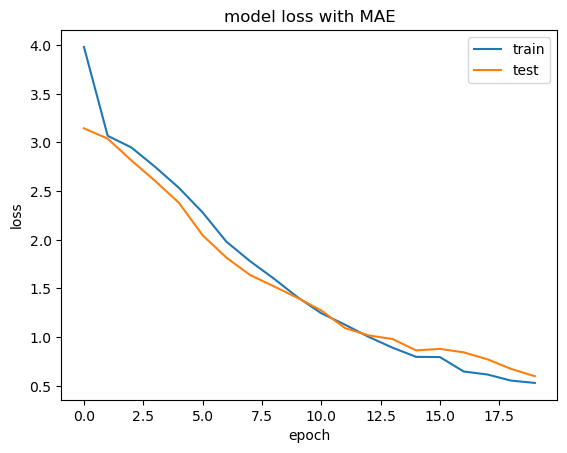

In [ ]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss with MAE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
score_1 = reg_model_1.evaluate(X_test, y_test_reg, verbose=0)
print(f'Minute Loss for Regression Model : {score_1[1]}') 

Minute Loss for Regression Model : 29.80454444885254


In [5]:
np.random.seed(42)
tf.random.set_seed(42)
reg_model_2 = tf.keras.models.Sequential([
      Rescaling(1./255, input_shape=input_shape),
      Conv2D(16, kernel_size=5, kernel_initializer='he_normal', activation='leaky_relu'),
      MaxPooling2D(pool_size=(2, 2)), 
      
      Conv2D(32, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      Conv2D(32, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      MaxPooling2D(pool_size=(2, 2)), 
      
      Conv2D(64, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      Conv2D(64, kernel_size=3, kernel_initializer='he_normal', activation='leaky_relu'),
      MaxPooling2D(pool_size=(2, 2)), 
      Dropout(.5),
      Flatten(),
      
      Dense(512, activation='relu', kernel_initializer='he_normal'),
      Dense(256, activation='relu', kernel_initializer='he_normal'),
      Dense(128, activation='relu', kernel_initializer='he_normal'),
      Dense(1, activation='linear'),      
])

In [6]:
reg_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 1)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 16)      416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                  

In [14]:
reg_model_2.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.001), 
    loss=[CSE], 
    metrics=[Mean_loss]
)

history_2 = reg_model_2.fit(X_train, y_train_reg, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
90/90 [==============================] - 73s 796ms/step - loss: 3.0903 - Mean_loss: 185.4169 - val_loss: 2.9602 - val_Mean_loss: 177.9366
Epoch 2/50
90/90 [==============================] - 71s 792ms/step - loss: 2.9917 - Mean_loss: 179.5009 - val_loss: 3.0152 - val_Mean_loss: 180.6784
Epoch 3/50
90/90 [==============================] - 72s 801ms/step - loss: 2.9809 - Mean_loss: 178.8555 - val_loss: 3.0060 - val_Mean_loss: 180.3997
Epoch 4/50
90/90 [==============================] - 73s 811ms/step - loss: 3.0073 - Mean_loss: 180.4365 - val_loss: 3.0008 - val_Mean_loss: 180.2038
Epoch 5/50
90/90 [==============================] - 72s 800ms/step - loss: 3.0298 - Mean_loss: 181.7873 - val_loss: 2.9944 - val_Mean_loss: 179.8745
Epoch 6/50
90/90 [==============================] - 72s 803ms/step - loss: 2.9878 - Mean_loss: 179.2698 - val_loss: 3.0063 - val_Mean_loss: 180.4100
Epoch 7/50
90/90 [==============================] - 72s 798ms/step - loss: 2.9683 - Mean_loss: 178.0997 - 

In [16]:
score_2 = reg_model_2.evaluate(X_test, y_test_reg, verbose=0)
print(f'Minute Loss for Regression Model : {score_2[1]}')

Minute Loss for Regression Model : 23.299638748168945


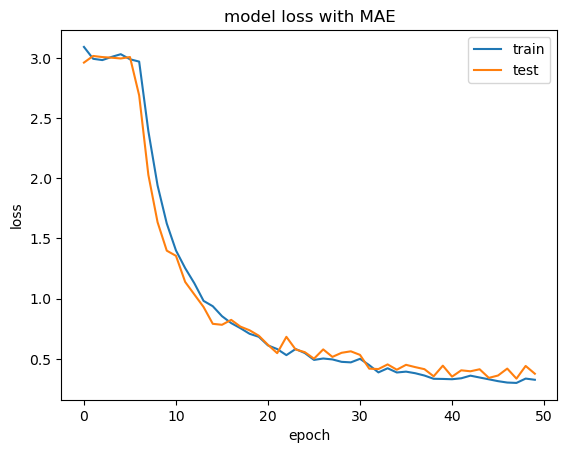

In [17]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss with MAE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()